In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
%matplotlib inline

In [76]:
df=pd.read_csv("baseball.csv")

In [77]:
df.head()
#wins,Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [78]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [79]:
df["RD"] = ""

In [80]:
df.RD = df.R - df.RA

In [81]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,RD
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,83
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,-4
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,29
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,-79
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,-114


In [82]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
RD     0
dtype: int64

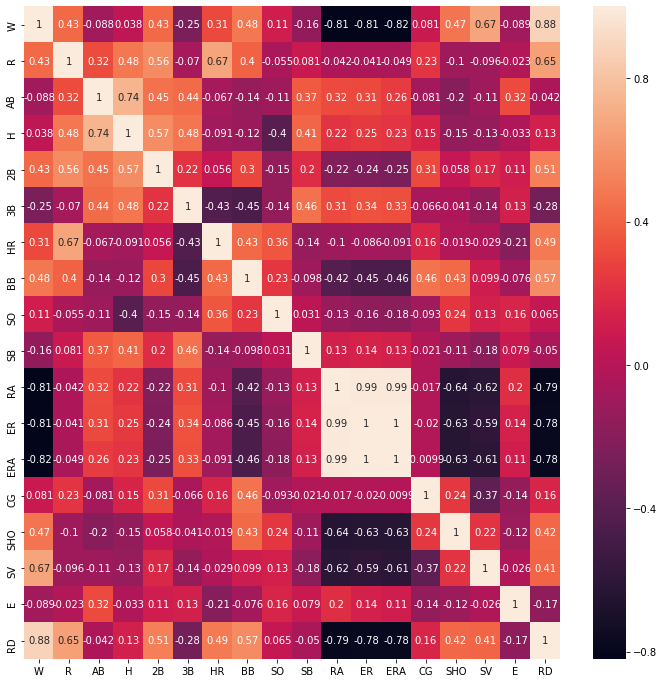

In [83]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

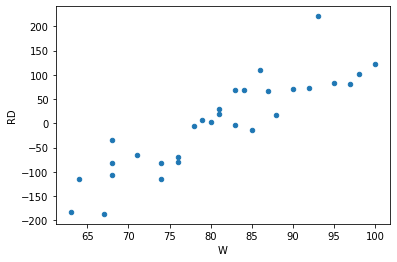

In [225]:
df.plot.scatter('W','RD')

In [214]:
x=df[['RD']]
y=df.iloc[:,0]

In [215]:
x.head()

,RD
0,83
1,-4
2,29
3,-79
4,-114


In [216]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [217]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 1)
(8, 1)
(22,)
(8,)


In [218]:
#using linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
print(lr.intercept_)
print(lr.coef_)

81.19111133410016
[0.09236474]


In [226]:
y_pred = lr.predict(x_test)

In [227]:
#using linear regression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print("r2 train score :", r2_train)
print("r2 test score :", r2_test)

r2 train score : 0.8179948012280083
r2 test score : 0.6800892062774254
